<h3> SUBMISSION: Proyek Kedua : Membuat Model Machine Learning dengan Data Time Series <h3>
<h4> Delvin Fachrizky

In [31]:
# MENYIAPKAN LIBRARY YANG AKAN DIGUNAKAN PADA PROJECT KALI INI
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Dropout

In [14]:
# MENYIAPKAN DATASET
dtfrm = pd.read_csv("datasets.csv")
# MELIHAT 5 DATA TERATAS
dtfrm.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [15]:
# MELIHAT 5 DATA TERAKHIR
dtfrm.tail()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
645670,2013-05-01,21.634,0.578,Zhejiang,China
645671,2013-06-01,24.679,0.596,Zhejiang,China
645672,2013-07-01,29.272,1.340,Zhejiang,China
645673,2013-08-01,29.202,0.869,Zhejiang,China
645674,2013-09-01,NaN,NaN,Zhejiang,China


In [9]:
# MELIHAT INFORMASI DARI DATASET YANG TELAH DIIMPORT
dtfrm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645675 entries, 0 to 645674
Data columns (total 5 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             645675 non-null  object 
 1   AverageTemperature             620027 non-null  float64
 2   AverageTemperatureUncertainty  620027 non-null  float64
 3   State                          645675 non-null  object 
 4   Country                        645675 non-null  object 
dtypes: float64(2), object(3)
memory usage: 24.6+ MB


In [10]:
# MELIHAT VALUE DARI KOLOM Country
dtfrm['Country'].value_counts()

Russia           254972
United States    149745
India             86664
China             68506
Canada            35358
Brazil            34328
Australia         16102
Name: Country, dtype: int64

In [21]:
# MENGAMBIL DATA DARI TAHUN 1945 HINGGA 2013
dtfrm['dt'] = pd.to_datetime(dtfrm['dt'])
get_data = (dtfrm['dt'] > '1945-01-01') & (dtfrm['dt'] <= '2013-09-01')
dtfrm.loc[get_data]

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
1077,1945-02-01,26.175,0.416,Acre,Brazil
1078,1945-03-01,26.662,0.436,Acre,Brazil
1079,1945-04-01,26.247,0.445,Acre,Brazil
1080,1945-05-01,24.600,1.270,Acre,Brazil
1081,1945-06-01,24.805,1.204,Acre,Brazil
...,...,...,...,...,...
645670,2013-05-01,21.634,0.578,Zhejiang,China
645671,2013-06-01,24.679,0.596,Zhejiang,China
645672,2013-07-01,29.272,1.340,Zhejiang,China
645673,2013-08-01,29.202,0.869,Zhejiang,China


In [22]:
# MENGAMBIL DATA NEGARA "CHINA" DARI KOLOM DATASET YANG TELAH ADA
dtfrm = dtfrm.loc[dtfrm['Country'].isin(['China'])]
display(dtfrm)

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
29935,1841-01-01,0.581,2.745,Anhui,China
29936,1841-02-01,2.716,1.832,Anhui,China
29937,1841-03-01,6.871,1.852,Anhui,China
29938,1841-04-01,13.748,2.200,Anhui,China
29939,1841-05-01,19.662,1.580,Anhui,China
...,...,...,...,...,...
645670,2013-05-01,21.634,0.578,Zhejiang,China
645671,2013-06-01,24.679,0.596,Zhejiang,China
645672,2013-07-01,29.272,1.340,Zhejiang,China
645673,2013-08-01,29.202,0.869,Zhejiang,China


In [23]:
# MELAKUKAN RESET INDEX DARI DATAFRAME DAN DROP PADA KOLOM COUNTRY
dtfrm.drop(['Country'], axis=1, inplace=True)
dtfrm.reset_index(drop=True)

,dt,AverageTemperature,AverageTemperatureUncertainty,State
0,1841-01-01,0.581,2.745,Anhui
1,1841-02-01,2.716,1.832,Anhui
2,1841-03-01,6.871,1.852,Anhui
3,1841-04-01,13.748,2.200,Anhui
4,1841-05-01,19.662,1.580,Anhui
...,...,...,...,...
68501,2013-05-01,21.634,0.578,Zhejiang
68502,2013-06-01,24.679,0.596,Zhejiang
68503,2013-07-01,29.272,1.340,Zhejiang
68504,2013-08-01,29.202,0.869,Zhejiang


In [25]:
# MELAKUKAN CEK TERHADAP DATA YANG MEMILIKI NILAI NULL
dtfrm.isnull().sum()

dt                                 0
AverageTemperature               780
AverageTemperatureUncertainty    780
State                              0
dtype: int64

In [27]:
# MEMBERSIHKAN DATA YANG MEMILIKI NILAI/VALUE NULL
dtfrm.dropna(subset=['AverageTemperature'], inplace=True)
dtfrm.dropna(subset=['AverageTemperatureUncertainty'], inplace=True)
dtfrm.isnull().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
State                            0
dtype: int64

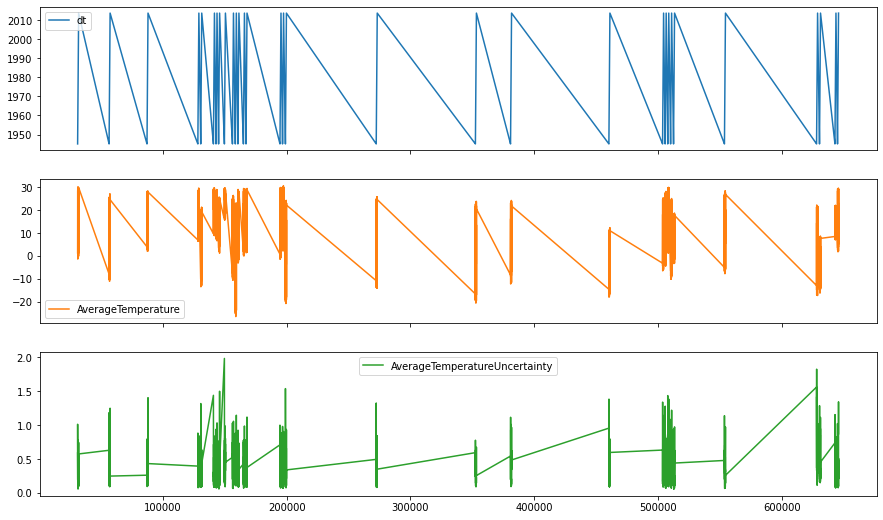

In [55]:
# MELAKUKAN PLOTING UNTUK MASING-MASING KOLOM
dtfrm_plot = dtfrm
dtfrm_plot[dtfrm_plot.columns.to_list()].plot(subplots=True, figsize=(15, 9))
plt.show()

dt                               datetime64[ns]
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
State                                    object
dtype: object

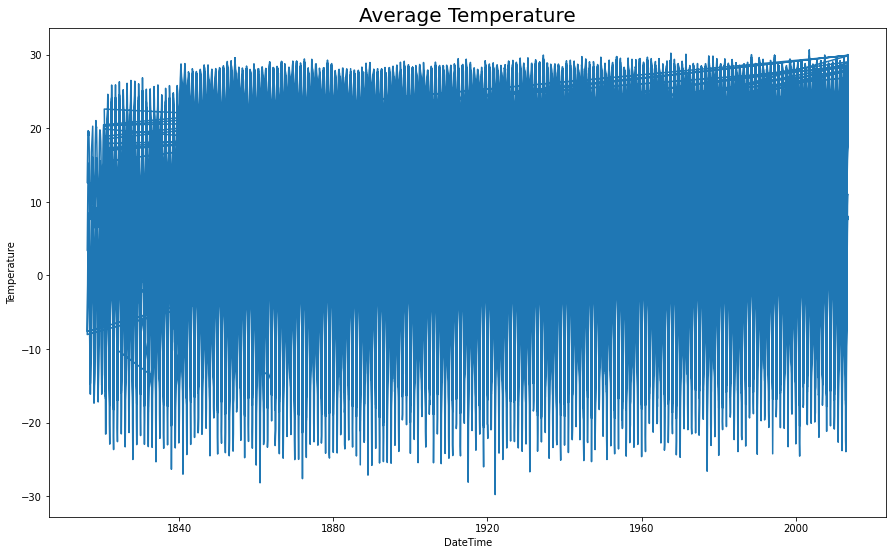

In [36]:
# PLOT WAKTU DAN TEMPERATUR
date_time = dtfrm['dt'].values
temperature = dtfrm['AverageTemperature'].values

date_time = np.array(date_time)
temperature = np.array(temperature)

plt.figure(figsize=(15,9))
plt.plot(date_time, temperature)

plt.title('Average Temperature', fontsize=20)
plt.ylabel('Temperature')
plt.xlabel('DateTime')

dtfrm.dtypes

In [42]:
# MELAKUKAN SPLIT DATASET DENGAN PERBANDINGAN 80:20 TRAINING/TESTING
X_train, X_test, y_train, y_test = train_test_split(temperature, date_time, train_size=0.8, test_size = 0.2, shuffle = False )
print('Data Train : ',len(X_train))
print('Data Validation : ',len(X_test))

Data Train :  54180
Data Validation :  13546


In [43]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  series = tf.expand_dims(series, axis=-1)
  ds = tf.data.Dataset.from_tensor_slices(series)
  ds = ds.window(window_size + 1, shift=1, drop_remainder = True)
  ds = ds.flat_map(lambda w: w.batch(window_size + 1))
  ds = ds.shuffle(shuffle_buffer)
  ds = ds.map(lambda w: (w[:-1], w[-1:]))
  return ds.batch(batch_size).prefetch(1)

In [44]:
# SEQUENTIAL MODELING
tf.keras.backend.set_floatx('float64')

train_set = windowed_dataset(X_train, window_size=64, batch_size=200, shuffle_buffer=1000)
val_set = windowed_dataset(X_test, window_size=64, batch_size=200, shuffle_buffer=1000)

model = Sequential([
    Bidirectional(LSTM(60, return_sequences=True)),
    Bidirectional(LSTM(60)),
    Dense(30, activation="relu"),
    Dense(10, activation="relu"),
    Dense(1),
])

In [47]:
# MENGHITUNG MAE 10% DAN IMPLEMENTASI DARI CALLBACK
Mae = (dtfrm['AverageTemperature'].max() - dtfrm['AverageTemperature'].min()) * 10/100
print(Mae)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae')<2.4 and logs.get('val_mae')<2.4):
      print("\nMAE dari model < 10% skala data")
      self.model.stop_training = True
callbacks = myCallback()

6.042999999999999


In [48]:
# LEARNING RATE SGD OPTIMIZER
optimizer = tf.keras.optimizers.SGD(lr=1.0000e-04, momentum=0.9)

model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

history = model.fit(train_set, epochs=100, validation_data = val_set, callbacks=[callbacks])

Epoch 1/100


c:\Users\DELVIN\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


271/271 [==============================] - 97s 342ms/step - loss: 13.5033 - mae: 13.9984 - val_loss: 10.1762 - val_mae: 10.6707
Epoch 2/100
271/271 [==============================] - 94s 345ms/step - loss: 10.0346 - mae: 10.5273 - val_loss: 6.8289 - val_mae: 7.3199
Epoch 3/100
271/271 [==============================] - 93s 342ms/step - loss: 7.3789 - mae: 7.8681 - val_loss: 6.1045 - val_mae: 6.5888
Epoch 4/100
271/271 [==============================] - 93s 343ms/step - loss: 6.1186 - mae: 6.6049 - val_loss: 5.2300 - val_mae: 5.7182
Epoch 5/100
271/271 [==============================] - 90s 333ms/step - loss: 2.9990 - mae: 3.4516 - val_loss: 2.2661 - val_mae: 2.7063
Epoch 6/100
271/271 [==============================] - ETA: 0s - loss: 1.7961 - mae: 2.2147
MAE dari model < 10% skala data
271/271 [==============================] - 90s 331ms/step - loss: 1.7961 - mae: 2.2147 - val_loss: 1.9292 - val_mae: 2.3577


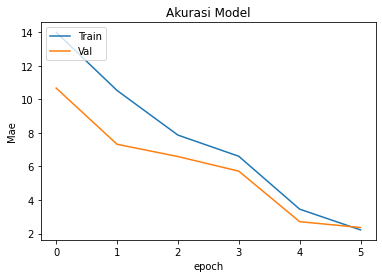

In [49]:
# MEMBUAT PLOT AKURASI MODEL
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Akurasi Model')
plt.ylabel('Mae')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

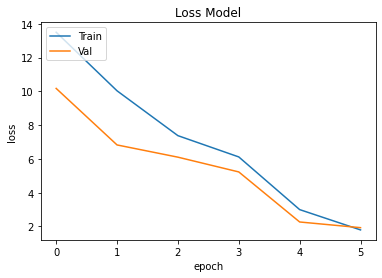

In [50]:
# MEMBUAT PLOT LOSS MODEL
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()